In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
from pylab import rcParams
from scipy.stats import f_oneway, ttest_ind
from statistics import mean 


In [2]:
%matplotlib inline


In [30]:
def plot_distribution(dist):
    plt.figure()
    ax = sns.distplot(dist)
    plt.axvline(np.mean(dist), color = 'k', linestyle = 'dashed', linewidth = 5)
    _, max_ = plt.ylim()
    plt.text(
        dist.mean() + dist.mean() / 10,
        max_ - max_ / 10,
        'Mean: {:.2f}'.format(dist.mean()),
    
    )
    return plt.figure

In [4]:
london_database = pd.read_csv('londres_imoveis.csv')

In [5]:
london_database.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,75,3,89,2020-03-16,0.59,1,2,0,NaN
1,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,160,3,0,NaN,NaN,2,324,0,NaN
2,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,49,1,26,2022-05-22,0.18,2,341,5,NaN
3,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,379,4,49,2022-06-06,0.36,3,251,7,NaN
4,31361,"Restful Room, Friendly House, East London",134606,Cryn,NaN,Newham,51.53403,0.02709,Private room,33,1,118,2022-06-05,0.81,2,310,2,NaN


In [6]:
london_database.isnull().sum() 
# prices are all filled with some number. By the way, before we go straight, we got to check some anomalies up.

id                                    0
name                                 22
host_id                               0
host_name                             6
neighbourhood_group               66152
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       17160
reviews_per_month                 17160
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           66152
dtype: int64

In [7]:
london_database[london_database['price'] < 50]
# there are many houses with prices lower than 50, which are abnormal, especially for a city like London.
# as I don't have any contact with the enterprise that launched this database, I am going to assume these are all correct values.

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
2,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.568610,-0.112700,Private room,49,1,26,2022-05-22,0.18,2,341,5,NaN
4,31361,"Restful Room, Friendly House, East London",134606,Cryn,NaN,Newham,51.534030,0.027090,Private room,33,1,118,2022-06-05,0.81,2,310,2,NaN
8,25123,Clean big Room in London (Room 1),103583,Grace,NaN,Barnet,51.574380,-0.210810,Private room,29,10,129,2020-03-15,0.87,3,0,0,NaN
10,38950,Room 1 Large Double Bedroom - front ground floor,167107,Paul,NaN,Haringey,51.586840,-0.086320,Private room,45,1,1,2021-12-12,0.17,3,42,1,NaN
11,39387,Stylish bedsit in Notting Hill ish flat.,168920,Alec,NaN,Westminster,51.526050,-0.199420,Private room,42,5,10,2019-11-03,0.10,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66129,50373947,Comfortable room in quiet house,406893933,Anne,NaN,Hounslow,51.423570,-0.449250,Private room,33,1,11,2021-10-10,0.93,2,262,11,NaN
66132,625273209869378415,Double bedroom in house!,135848394,Freddie,NaN,Hounslow,51.423840,-0.445550,Private room,40,1,1,2022-05-31,1.00,3,358,1,NaN
66135,31271610,Large double room in family home,35378198,Manuelle,NaN,Kingston upon Thames,51.385690,-0.319780,Private room,42,1,7,2022-03-27,0.18,2,170,5,NaN
66137,27727291,Chillout,157341795,Mark,NaN,Richmond upon Thames,51.384350,-0.346570,Private room,40,2,2,2020-02-20,0.06,2,358,0,NaN


In [12]:
mean_london = mean(london_database['price'])
mean_london

159.39815878582658

In [19]:
london_database.mean(axis = 0)
# just to check if mean_london is correct.

C:\Users\Pichau\AppData\Local\Temp/ipykernel_12712/3438843281.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  london_database.mean(axis = 0)


id                                6.702216e+16
host_id                           1.149402e+08
neighbourhood_group                        NaN
latitude                          5.150940e+01
longitude                        -1.277489e-01
price                             1.593982e+02
minimum_nights                    6.828229e+00
number_of_reviews                 1.700290e+01
reviews_per_month                 7.378978e-01
calculated_host_listings_count    1.283511e+01
availability_365                  1.016184e+02
number_of_reviews_ltm             3.653722e+00
license                                    NaN
dtype: float64

In [20]:
amsterdam_database = pd.read_csv('listings.csv')


In [22]:
mean_amsterdam = mean(amsterdam_database['price'])
mean_amsterdam

198.01960149036125

In [24]:
# I am going to convert the data where the column is price in both databases, so it's a little bit better to work with.

In [26]:
mean_array_london = london_database['price'].to_numpy()
mean_array_london

array([  75,  160,   49, ...,   92, 1436,  155], dtype=int64)

In [28]:
mean_array_amsterdam = amsterdam_database['price'].to_numpy()
mean_array_amsterdam

array([ 88, 105, 152, ..., 180, 174,  65], dtype=int64)

C:\Users\Pichau\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


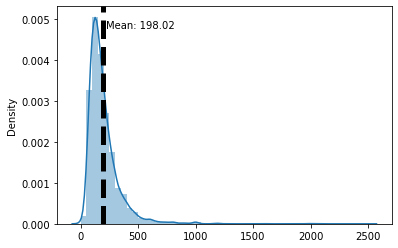

In [34]:
plot_distribution(mean_array_amsterdam);

C:\Users\Pichau\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


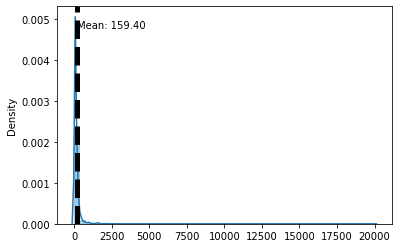

In [33]:
plot_distribution(mean_array_london);

In [36]:
mean_array_london.std()

396.23024378948884

In [37]:
mean_array_amsterdam.std()

140.5355950041894

In [46]:
def comparing_two_means(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics = %.3f, p = %.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject HO)')
    else:
        print('They are different(reject HO)')

In [47]:
sample_size = 1000
amsterdam_sampled = np.random.choice(mean_array_amsterdam, sample_size)
london_sampled = np.random.choice(mean_array_london, sample_size)
comparing_two_means(amsterdam_sampled, london_sampled, 0.05, sample_size)

Statistics = 6.404, p = 0.000
They are different(reject HO)


In [48]:
# P value is 0!!!!!!! This is awkward. By the way, that's it.